# AI with Python - Unsupervised Learning:Clustering

# Algorithms for Clustering the Data

# 1. K-Means Algorithm

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [9]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples = 500, centers = 4,cluster_std = 0.40, random_state = 0)

# In recent update "sklearn.datasets.samples_generator" has been changed to "sklearn.datasets"

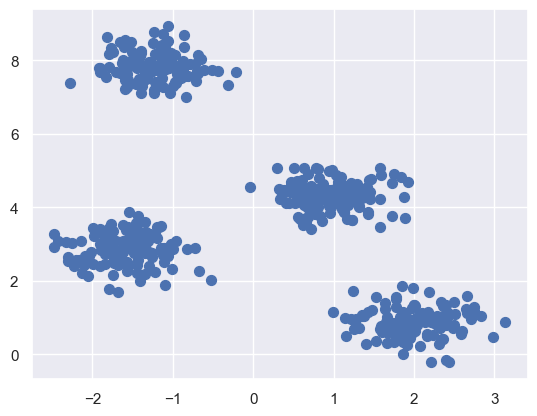

In [10]:
plt.scatter(X[:, 0], X[:,1], s=50);
plt.show()

C:\Users\91997\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91997\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


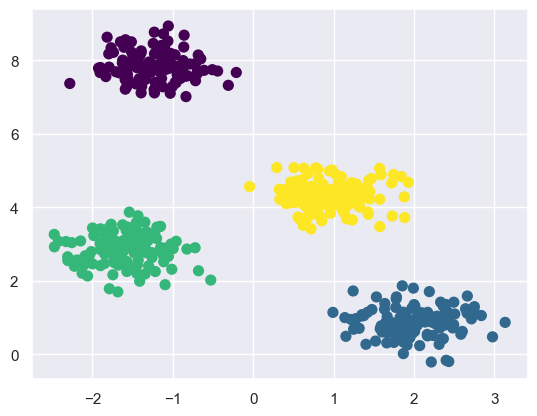

In [11]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0],X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_

# 2. Mean shift Algorithm

In [12]:
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [13]:
from sklearn.datasets import make_blobs

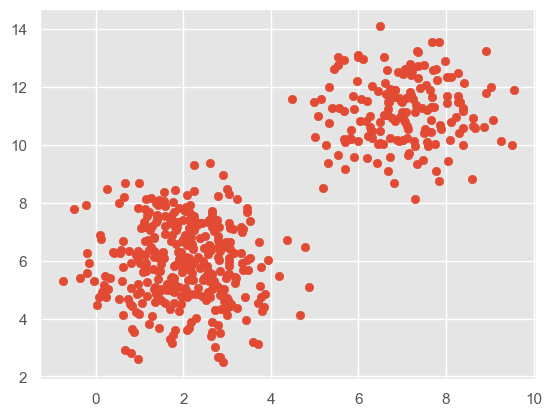

In [14]:
centers = [[2,7],[2,5],[7,11]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [15]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [16]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:",n_clusters_)


[[ 1.98223127  6.01424609]
 [ 6.99127797 11.17514254]]
Estimated clusters: 2


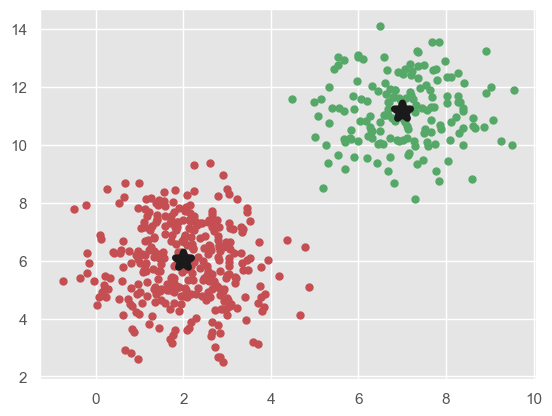

In [17]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker = "*",color = "k",s = 150,linewidth = 5,zorder = 10)
plt.show()

# 3. Measuring the Clustering Performance

# - Silhouette Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

import sklearn.metrics as metrics


In [19]:
from sklearn.datasets import make_blobs

X,y_true = make_blobs(n_samples = 500, centers = 4, cluster_std = 0.40, random_state = 0)


In [20]:
scores = []
values = np.arange(2,10)

In [21]:
for num_clusters in values:
    kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)
kmeans.fit(X)

C:\Users\91997\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=9, n_init=10)

In [22]:
score = metrics.silhouette_score(X, kmeans.labels_,metric = 'euclidean', sample_size = len(X))

# it will give Name error for using"metrics" so use "import sklearn.metrics as metrics" in the import section

In [23]:
print("\nNumber of clusters =", num_clusters)
print("Silhouette score =",score)
scores.append(score)


Number of clusters = 9
Silhouette score = 0.33361854890904113


In [24]:
num_clusters = np.argmax(scores) + values[0]
print("\nOptimal number of clusters =", num_clusters)


Optimal number of clusters = 2


# 4.Finding Nearest Neighbors

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [26]:
A = np.array([[3.1, 2.3], [2.3, 4.2], [3.9, 3.5], [3.7, 6.4], [4.8, 1.9], [8.3, 3.1], [5.2, 7.5], [4.8, 4.7], [3.5, 5.1], [4.4, 2.9]]) 
             

In [27]:
k = 3

In [28]:
test_data = [3.3,2.9]

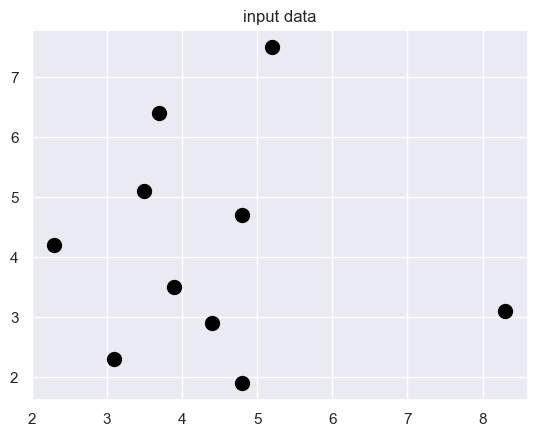

In [29]:
plt.figure()
plt.title("input data")
plt.scatter(A[:,0],A[:,1],marker = 'o',s = 100, color = 'black')

# the below given code is updated by me due to error in indices with the help of chatgpt

K Nearest Neighbors:
1 is [3.1 2.3] with distance 0.6324555320336759
2 is [3.9 3.5] with distance 0.8485281374238571
3 is [4.4 2.9] with distance 1.1000000000000005


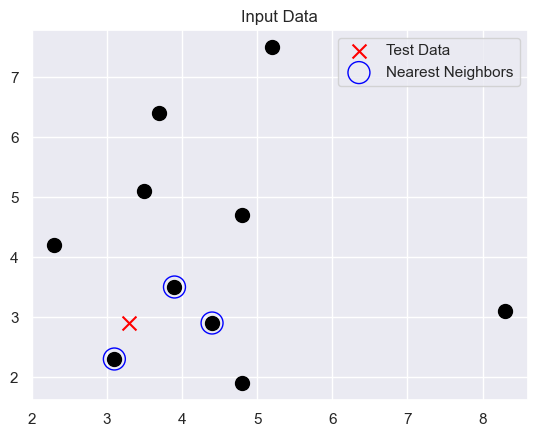

In [30]:
# Create NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(A)
distances, indices = knn_model.kneighbors([test_data])

print('K Nearest Neighbors:')
for rank, index in enumerate(indices[0], start=1):
    print(f"{rank} is {A[index]} with distance {distances[0][rank-1]}")

# Visualization (optional)
plt.figure()
plt.title("Input Data")
plt.scatter(A[:, 0], A[:, 1], marker='o', s=100, color='black')
plt.scatter(test_data[0], test_data[1], marker='x', s=100, color='red', label='Test Data')
plt.scatter(A[indices[0], 0], A[indices[0], 1], marker='o', s=250, color='blue', facecolors='none', label='Nearest Neighbors')
plt.legend()
plt.show()


# K-Nearest Neighbors Classifier

# Concept of KNN Classifier

In [103]:
from sklearn.datasets import *
import pandas as pd
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [104]:
def Image_display(i):
    plt.imshow(digit['images'][i],cmap = 'Greys_r')
    plt.show()

In [105]:
digit = load_digits()
digit_d = pd.DataFrame(digit['data'][0:1600])

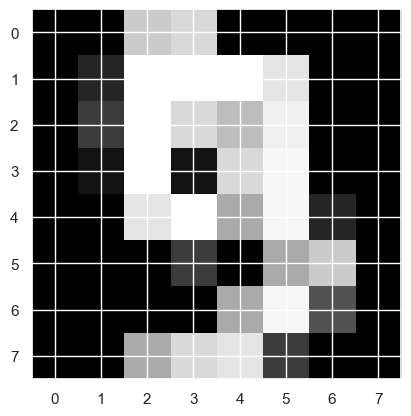

In [106]:
Image_display(9)

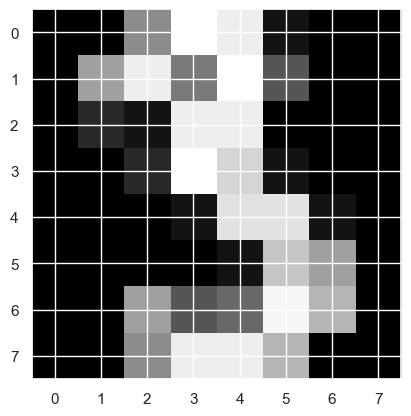

In [107]:
Image_display(3)

In [108]:
train_x = digit['data'][:1600]
train_y = digit['target'][:1600]
KNN = KNeighborsClassifier(20)
KNN.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=20)

In [109]:
KNeighborsClassifier(algorithm = 'auto',leaf_size = 30,metric = 'minkowski',metric_params = None,n_jobs = 1,n_neighbors = 20,p = 2, weights = 'uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=20)

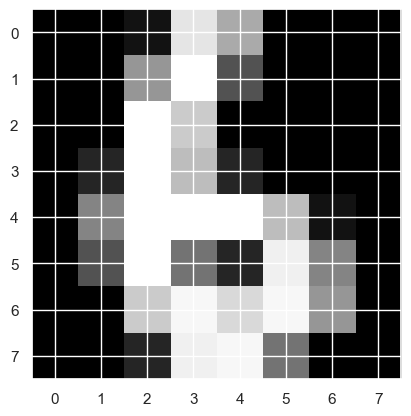

In [110]:
test = np.array(digit['data'][1725])
test1 = test.reshape(1,-1)
Image_display(1725)

In [111]:
KNN.predict(test1)

array([6])

In [112]:
digit['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])